In [410]:
# Daniyal Rahim ...................................DS homework 3..........................................d07605@st.habib.edu.pk

In [411]:
import pandas as pd
import seaborn as sns             #visualisation
import matplotlib.pyplot as plt   #visualisation
%matplotlib inline

In [412]:
#-------------------------Part 1-------------------------------------------------------------

In [413]:
df = pd.read_csv("loan_small.csv")

In [414]:
duplicate_rows_df = df[df.duplicated()] #checking for duplicate values
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 47)


In [415]:
df1 = df.iloc[:, 5].str.split().str.get(0) #spliting term column into integer and "years".
df1 = df1.astype(int) #picking first value and assgning it as integer
df_1 = df
df_1.iloc[:, 5] = df1

C:\Users\NCS\AppData\Local\Temp\ipykernel_11368\1628784591.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_1.iloc[:, 5] = df1


In [416]:
df2 = df_1.iloc[:, 11]                  #replacing symbols and word in emp_length col.
df2 = df2.str.replace(" years", "")
df2 = df2.str.replace(" year", "")
df2 = df2.str.replace("+", "")
df2 = df2.str.replace("< ", "")
df2 = df2.str.replace("n/a", "")


# df2 = df2.str.extract(r'(\d)')
# df2

C:\Users\NCS\AppData\Local\Temp\ipykernel_11368\355292349.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2 = df2.str.replace("+", "")


In [424]:
# df2.isnull().sum()         # checking for null values
df2 = df2.fillna(0)        # filling that null value with 0.
df2 = df2.astype(int)

In [427]:
df2 = df2.replace(0, df2.mean()).astype(int) # replacing that 0 value with mean.

In [428]:
df_1.iloc[:, 11] = df2 

C:\Users\NCS\AppData\Local\Temp\ipykernel_11368\970714847.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_1.iloc[:, 11] = df2


In [429]:
df3 = df_1.iloc[:,16] #checking the type of values in loan_status
df3.value_counts()

Fully Paid            729
Charged Off           176
Current                91
Late (31-120 days)      2
Default                 1
Name: loan_status, dtype: int64

In [430]:
df3 = df3.replace("Fully Paid", "good")  #replacing values with binary values
df3 = df3.replace("Charged Off", "good")
df3 = df3.replace("Current", "good")
df3 = df3.replace("Late (31-120 days)", "bad")
df3 = df3.replace("Default", "bad")
# df3
df3.value_counts()

good    996
bad       3
Name: loan_status, dtype: int64

In [431]:
df_1.iloc[:,16] = df3

In [432]:
df4 = df_1.loc[:,"mths_since_last_delinq"]


In [433]:
df_1.isnull().sum()

id                           0
member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title                   51
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
pymnt_plan                   0
purpose                      0
title                        0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
mths_since_last_delinq     774
mths_since_last_record     979
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_ac

In [434]:

df_1.loc[:, "mths_since_last_delinq"].fillna(-1, inplace = True)
df_1.loc[:, "mths_since_last_record"].fillna(-1, inplace = True)

In [435]:
### We will use Mode to fill up missing values in Categorical columns

df_1.loc[:, "last_pymnt_d"].fillna(df_1.loc[:, "last_pymnt_d"].mode()[0], inplace = True)

In [436]:
#-------------------------Part 2-------------------------------------------------------------

In [437]:
# appropriate summary (count, mean, median or mode) tables

In [438]:
a = df_1.groupby(['verification_status'])['term'].mean().reset_index(name="Term")
a

#Through this table we can analyze the dependency of loan repayment duration on the verfication status of the borrower. It is 
# obvious and has been shown here as well, that borrowers going through proper process of verification and getting their status verfied
# are on the better edge than the non verfied or source verified ones. As a result, verified costumer get more time to repay their
# loans hence are more relaxed then not verified one.

,verification_status,Term
0,Not Verified,38.933333
1,Source Verified,41.978022
2,Verified,46.622951


In [439]:
b = df_1.groupby(['grade'])['emp_length'].mean().nlargest(10).reset_index(name="employment length")
b

# While moving from A to G grade the risk associated with lending the loan increases. Hence for G grades loan the investor
# strictly considers a credible borrower with mean employment length of 6.4 months. The number gradually decreases
# the risk associated with the loan repayment decreases. This is because, eventhough the employment length is less, the 
# invesor is assured that his loan will be repayed in due time as the risk associated with it is very less.

,grade,employment length
0,G,6.400000
1,E,5.902778
2,C,5.483092
3,D,5.463768
4,A,5.297030
5,B,5.192090
6,F,4.761905


In [440]:
# UniVariate Analysis

Text(0.5, 1.0, 'Barchart of Loan Status')

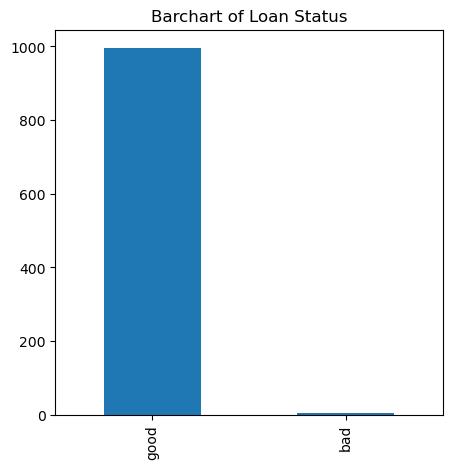

In [441]:
# bar chart
a = df_1['loan_status'].value_counts()
a.plot(kind='bar', figsize=(5,5))
plt.title('Barchart of Loan Status')


# This plot clearly shows that the loan status of most of the loans are good, and the bank or lender who is lending the 
# amount is on a safe side. There are very less chances of loan going default or of late repayment.

Text(0.5, 1.0, 'Histogram of employment length')

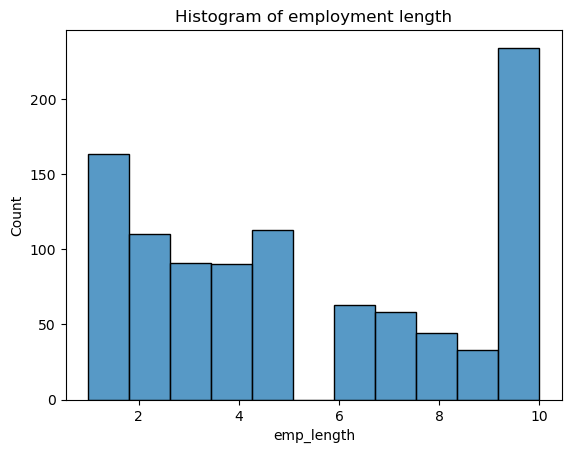

In [442]:
# histogram
sns.histplot(data=df_1, x="emp_length")
plt.title('Histogram of employment length')


# This is also an relaxing factor for the lender/ bank. Because most of their customers are having 10 or greater than 
# 10 months employment length. This will help them ensure the Creditworthiness of the borrower as they would know that
# whether borrower is capable of repaying the loan or not.  

In [443]:
# BiVariate Analysis

Text(0.5, 1.0, 'scattered plot b/w revolving balance and revolving utility')

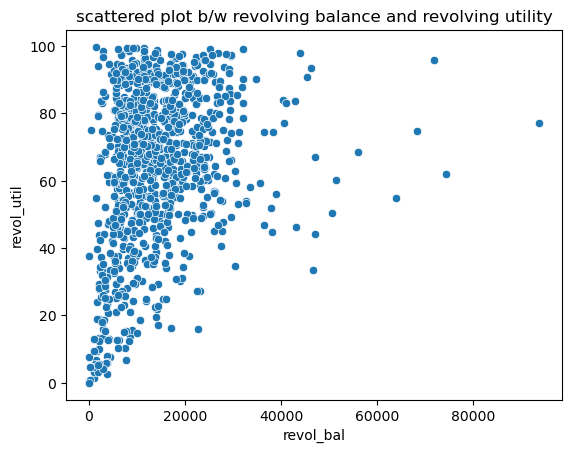

In [444]:
# At least one scatter plot (continuous vs continuous)

sns.scatterplot(data=df_1, x="revol_bal", y="revol_util")
plt.title('scattered plot b/w revolving balance and revolving utility')


# revolving balance indicates the total amount that the borrower currently owes on these revolving accounts (outstanding balance or amount of debt.) 
# Revolving Untilization is a measure of how much of the borrower's available revolving credit they are currently using (revolving utilization rate.)
# A high reolving utilization rate indicates that the borrower is using a significant portion of their available credit. While low value show that borrower
# is using a smaller portion of their avaible credit.

# By looking at the scattered plots, one can notice that most of the people
# have low rate of revolving utilization.
# This shows that most of the people are well aware of their, current state
# and are spending less of their avaible credits becuase they owe their
# debt to lender. This may be more favrourable to the lenders as they are sure
# that people are using their money with a sound mind. 

Text(0.5, 1.0, 'grade & installment relationship')

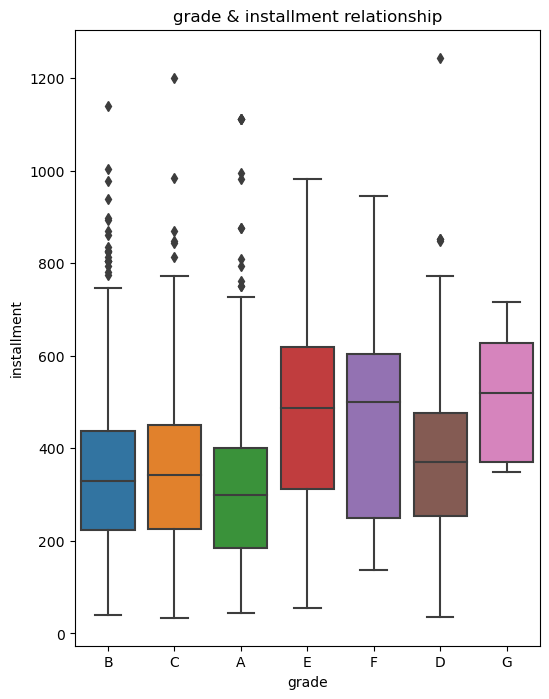

In [445]:
#At least one visualization for (discrete vs continuous)

plt.figure(figsize=(6,8))
# colors = ['red', 'green','blue']
sns.boxplot(data =df_1, x='grade', y='installment')
plt.title('grade & installment relationship')

# This graph shwos the popularity of B grade loan the most and G grade loan the least. The also tells that investors are not
# comfortable in giving loan for grade C or below. Because that comes with a higher risk of non return or default loan. Mostly,
# they are comfortable in investing in a moderate risk loan. The installments therefore are conjusted in B, C and A type loans
# and varies from high to low value. But for lower grade loans, the installments are mostly higher because investors wants the
# money backas soon as possible to lower the risk of default. 

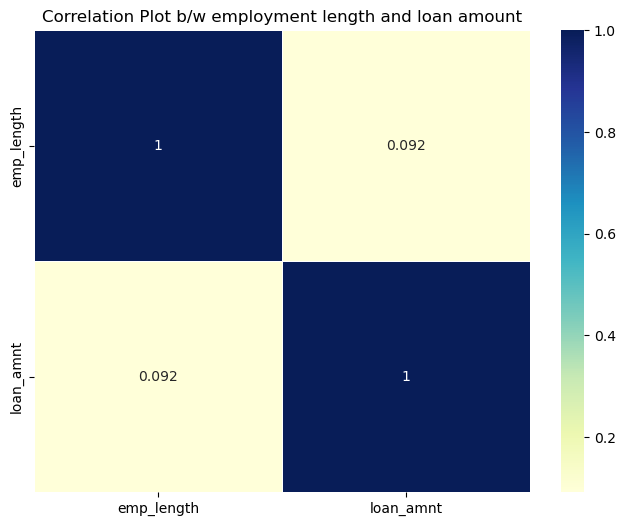

In [446]:
# One correlation plot

continuous_vars = df_1[['emp_length', 'loan_amnt']]  # Replace with your variable names

# Calculate the correlation matrix
correlation_matrix = continuous_vars.corr()

# Create a correlation plot using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Plot b/w employment length and loan amount')
plt.show()

# This correlation plot clearly shows that there is a direct relationship between employment length and loan amount given to 
# borrower. This is because borrowers with strong and longer employment history/ length are more safer and risk free option
# for lenders, as there are higher chances that they may work harder to repay their loans with intrest.  

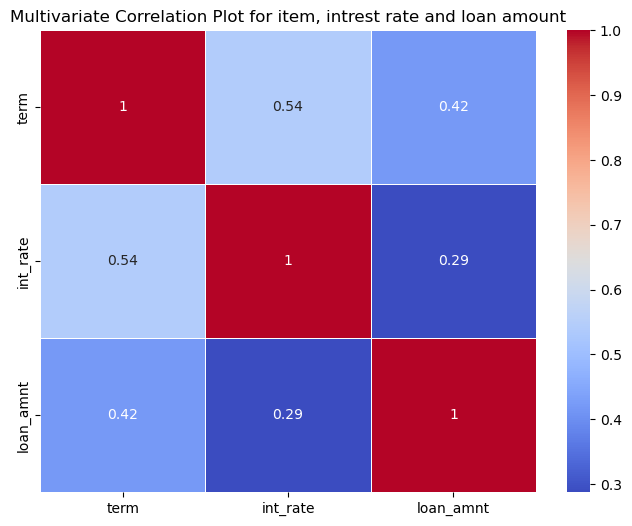

In [447]:
# Multivariate visualization (more than two variables)


continuous_vars = df_1[['term', 'int_rate', 'loan_amnt']]  # Replace with your variable names

# Calculate the correlation matrix
correlation_matrix = continuous_vars.corr()

# Create a correlation plot using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Multivariate Correlation Plot for item, intrest rate and loan amount')
plt.show()

# This multivariate correlation plot shows the details of how intrest rate, term and loan amount are linked together. It 
# is very clear that as the number of terms increase i.e. the number of months in which the buyer is expected to repay
# the loan increase, the loan amount decreses gradually. This may happen because loans with longer duration may be non profitable
# to the lender. Because intrest rate is slowly increasing with repayment duration. However, if the same amount of money is given
# to more people but for short duration this may be a lot more profittable to lender. As in short duration he may collect small
# profits from multiple people, while small profit will be gained if a borrower keeps his money for a longer period of time as
# intrest rate is low.

# It may also be notted that, intrest rate is inversly proportional to the loan amount. Because greater the intrest rate,
# lower will be the amount borrowed by the borrower, in order to not pay extra money than he issued from the lender.